In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [27]:
# Load dataset
data = pd.read_csv("/content/Creditcard_data.csv")

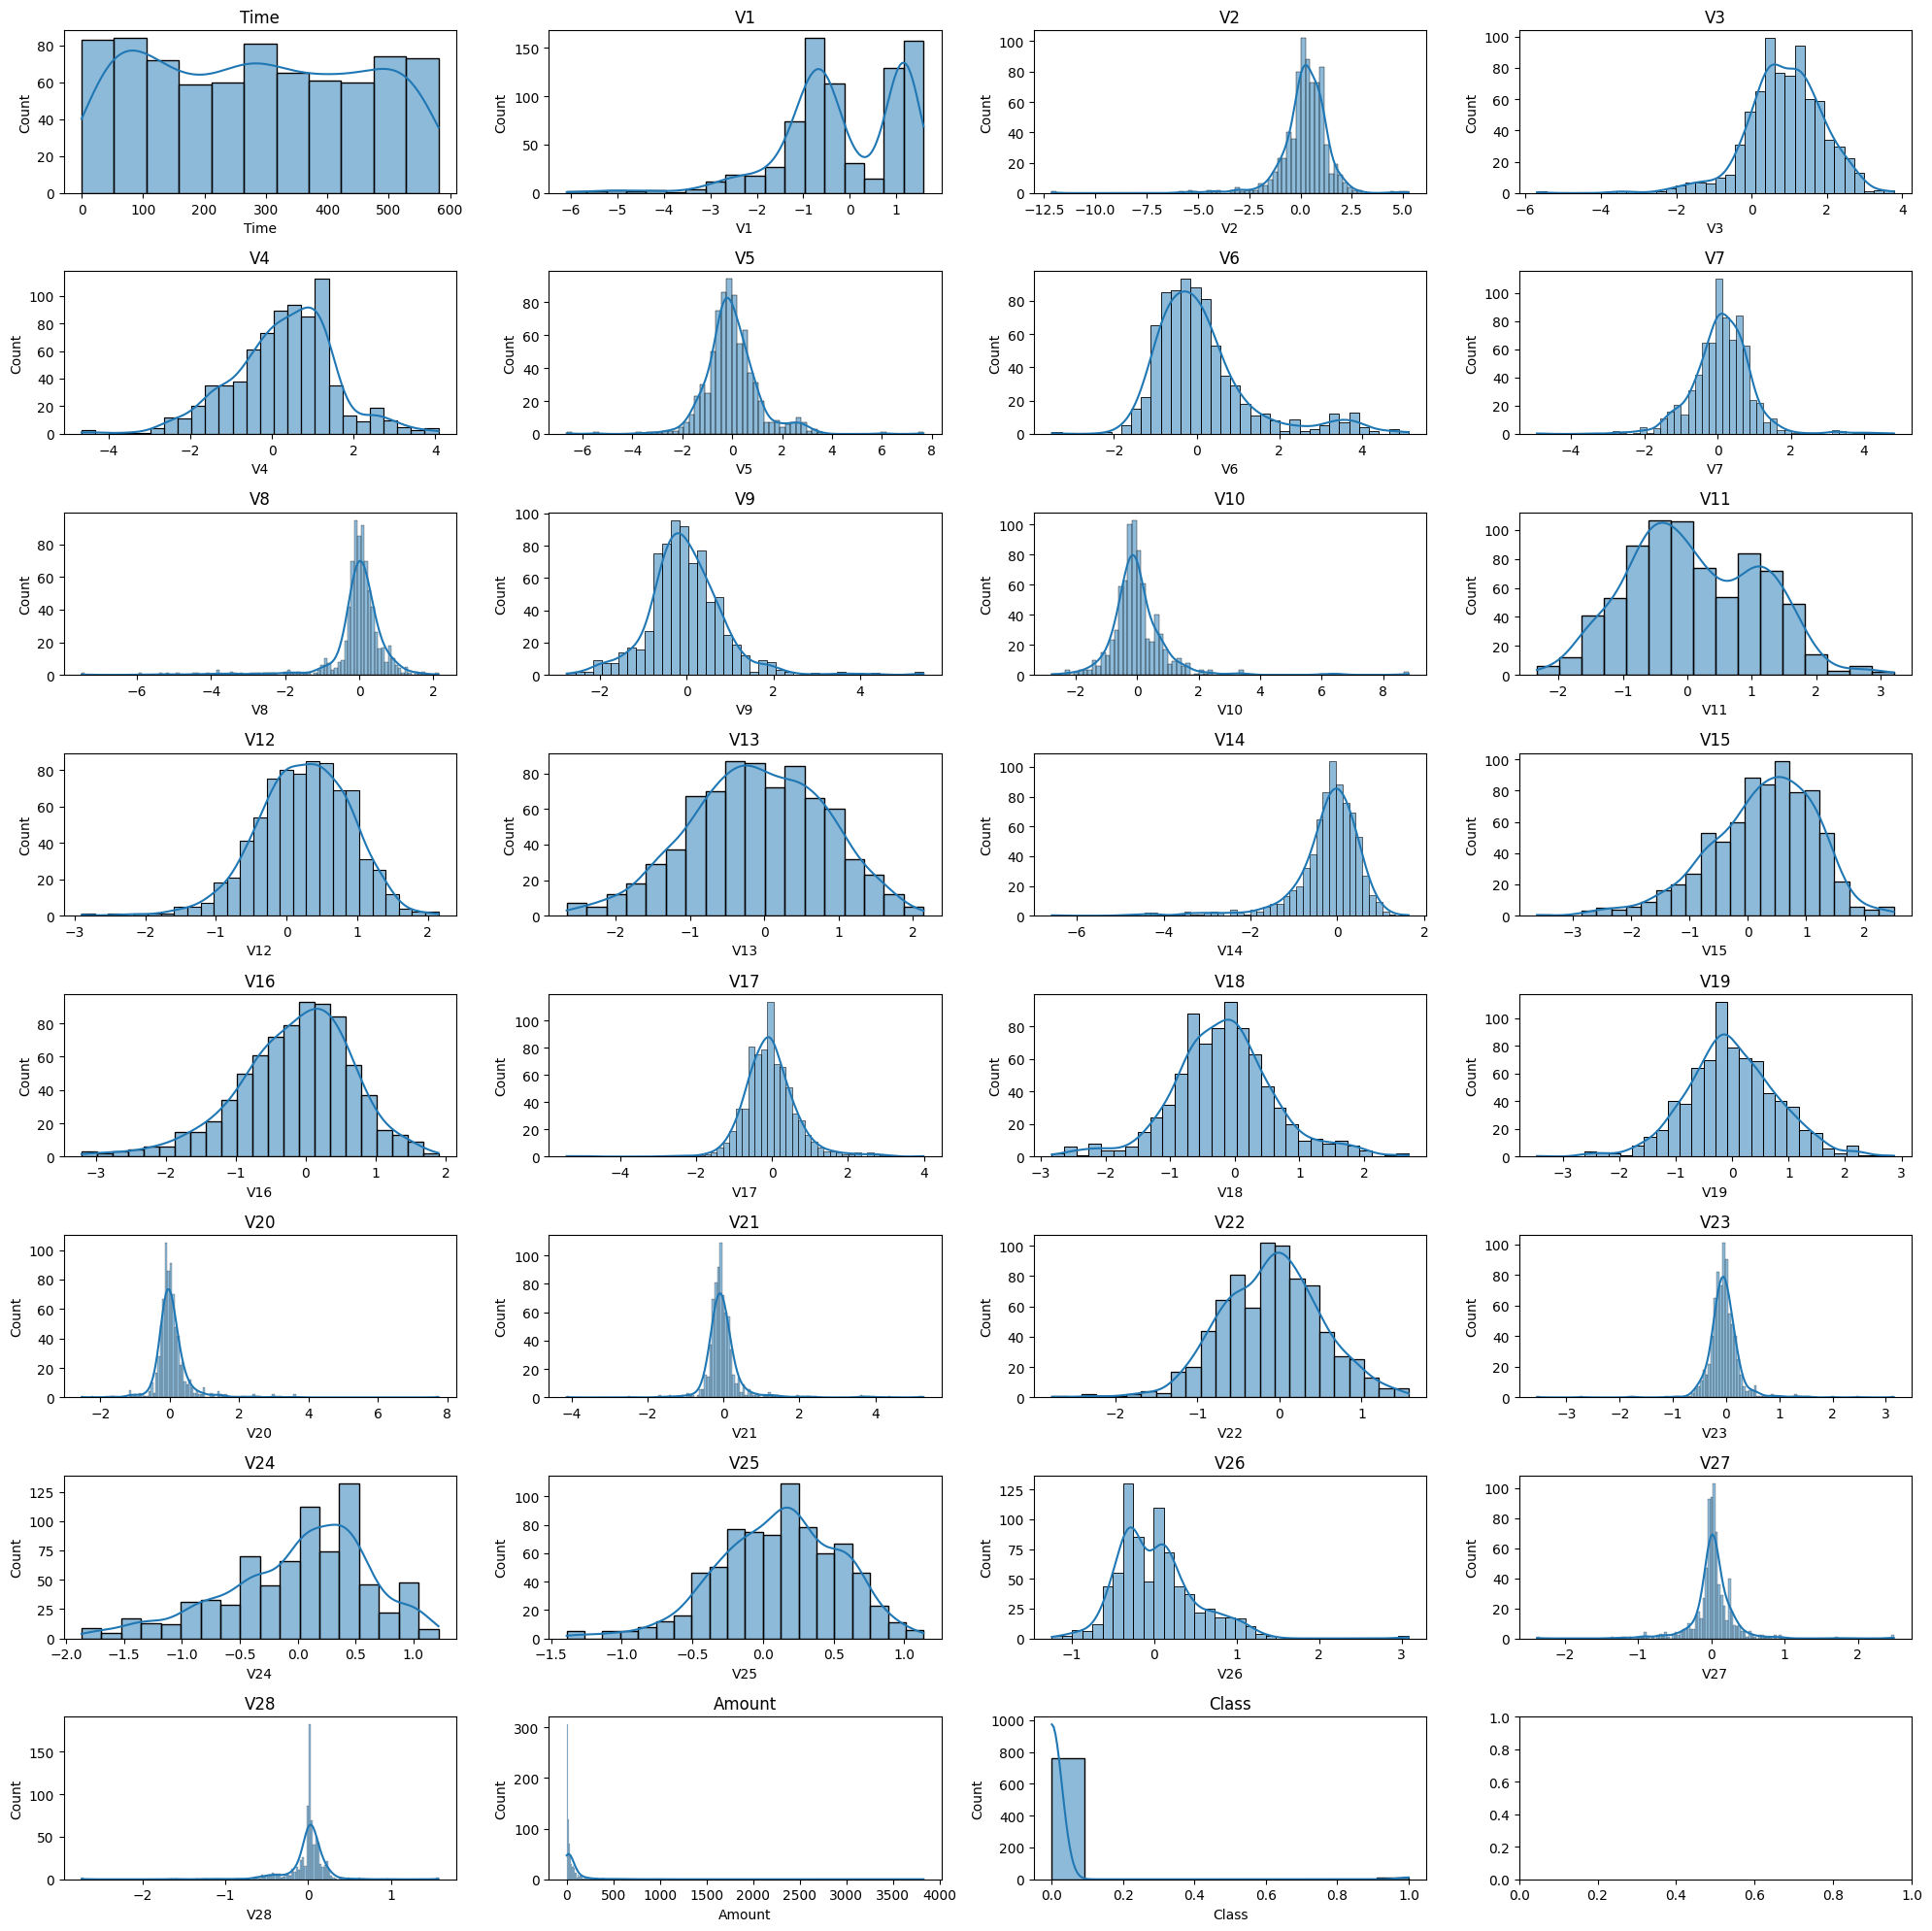

In [28]:
# Visualize distributions
fig, axes = plt.subplots(8, 4, figsize=(20, 20))
axes = axes.flatten()
for i, col in enumerate(data.select_dtypes(include=[np.number]).columns):
    sns.histplot(data[col], kde=True, ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()


In [29]:
# Define features and target
features = data.drop('Class', axis=1)
target = data['Class']

In [30]:
# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
features_resampled, target_resampled = smote.fit_resample(features, target)

In [31]:
# Generate samples
def generate_samples(df):
    samples = []
    samples.append(df.sample(frac=0.2, random_state=42))  # Random sampling
    samples.append(df.groupby('Class').apply(lambda group: group.sample(frac=0.2, random_state=42)).reset_index(drop=True))  # Stratified sampling
    interval = len(df) // int(0.2 * len(df))
    samples.append(df.iloc[np.arange(0, len(df), interval)])  # Systematic sampling
    df['Cluster'] = np.arange(len(df)) % 5
    cluster_sample = df[df['Cluster'] == np.random.choice(5)].drop('Cluster', axis=1)
    samples.append(cluster_sample)  # Cluster sampling
    samples.append(df.sample(n=int(0.2 * len(df)), replace=True, random_state=42))  # Bootstrapping
    return samples

resampled_data = pd.concat([pd.DataFrame(features_resampled, columns=features.columns),
                            pd.DataFrame(target_resampled, columns=['Class'])], axis=1)
samples = generate_samples(resampled_data)


<ipython-input-31-b95f672654df>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  samples.append(df.groupby('Class').apply(lambda group: group.sample(frac=0.2, random_state=42)).reset_index(drop=True))  # Stratified sampling


In [32]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

In [33]:
# Evaluate models
def evaluate_models(X_train, y_train, X_test, y_test, models):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        results[name] = accuracy_score(y_test, predictions)
    return results


In [34]:
# Analyze each sample
for idx, sample in enumerate(samples):
    sample_features = sample.drop('Class', axis=1)
    sample_target = sample['Class']
    X_train, X_test, y_train, y_test = train_test_split(sample_features, sample_target, test_size=0.2, random_state=42)
    scores = evaluate_models(X_train, y_train, X_test, y_test, models)
    best_model = max(scores, key=scores.get)
    print(f"Sample {idx + 1} Results:")
    print(scores)
    print(f"Best Model: {best_model} - Accuracy: {scores[best_model]:.4f}\n")


Sample 1 Results:
{'Logistic Regression': 0.9016393442622951, 'Decision Tree': 0.9016393442622951, 'Random Forest': 0.9836065573770492, 'SVM': 0.7213114754098361, 'KNN': 0.6557377049180327}
Best Model: Random Forest - Accuracy: 0.9836

Sample 2 Results:
{'Logistic Regression': 0.9516129032258065, 'Decision Tree': 0.9193548387096774, 'Random Forest': 0.9838709677419355, 'SVM': 0.7258064516129032, 'KNN': 0.7419354838709677}
Best Model: Random Forest - Accuracy: 0.9839

Sample 3 Results:
{'Logistic Regression': 0.7580645161290323, 'Decision Tree': 0.8870967741935484, 'Random Forest': 0.9838709677419355, 'SVM': 0.6774193548387096, 'KNN': 0.7258064516129032}
Best Model: Random Forest - Accuracy: 0.9839

Sample 4 Results:
{'Logistic Regression': 1.0, 'Decision Tree': 0.9344262295081968, 'Random Forest': 0.9836065573770492, 'SVM': 0.6885245901639344, 'KNN': 0.7540983606557377}
Best Model: Logistic Regression - Accuracy: 1.0000

Sample 5 Results:
{'Logistic Regression': 0.9508196721311475, 'De